In [25]:
#start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#loading dataset
df=pd.read_csv(r"C:\Users\user\Desktop\Disease-Classifier\Data\diabetes.csv")
df.head() 

#Features
x=df.drop('Outcome', axis=1).values
y=df['Outcome'].values

# Train-test split
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2, random_state=42)

#Normalize
scaler = StandardScaler()
xtrainnorm = scaler.fit_transform(xtrain)
xtestnorm = scaler.transform(xtest)

def sigmoid(z):
    return 1/(1+np.exp(-z))


w = np.zeros(xtrainnorm.shape[1])
b=0
lr=0.01
bce=[]
iterations=1000

for i in range(1,iterations+1):
    z = np.dot(xtrainnorm, w) + b
    ypred=sigmoid(z)
    loss=-np.mean(ytrain*np.log(ypred+1e-8)+(1-ytrain)*np.log(1-ypred+1e-8))
    bce.append(loss)

    grad = ypred - ytrain
    wgrad=np.dot(xtrainnorm.T, grad) / len(ytrain)
    bgrad=np.mean(grad)
    w-=lr*wgrad
    b-=lr*bgrad
    if i == iterations:
        print(f"Final Loss: {loss}")

Final Loss: 0.48033877259401636


Threshold=0.5
Accuracy: 0.7337662337662337
Precision: 0.6206896551724138
Recall: 0.6545454545454545
Confusion Matrix:
 [[77 22]
 [19 36]]


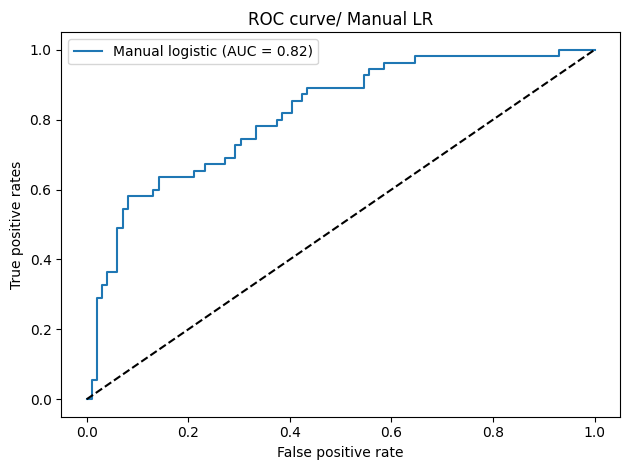

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

#Predicting probs on test set
ztest=np.dot(xtestnorm,w)+b
yprobtest=sigmoid(ztest)

#Defining threshold
ythresh_05=(yprobtest>=0.5).astype(int)

#Metrics
acc=accuracy_score(ytest,ythresh_05)
prec=precision_score(ytest,ythresh_05)
rec=recall_score(ytest,ythresh_05) 
cm=confusion_matrix(ytest,ythresh_05)

print("Threshold=0.5")
print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("Confusion Matrix:\n",cm)

#ROC curve
fpr,tpr,_=roc_curve(ytest, yprobtest)#fp and tp rates
roc_auc=auc(fpr,tpr) #auc=area under curve

plt.figure()
plt.plot(fpr,tpr,label=f"Manual logistic (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rates")
plt.title("ROC curve/ Manual LR")
plt.tight_layout()
plt.savefig("results/manual_roc.png")
plt.legend()
plt.show()


In [27]:
#Lowering threshold
threshold=0.3
ythresh_03=(yprobtest>=threshold).astype(int)

#Metrics
acc3=accuracy_score(ytest,ythresh_03)
prec3=precision_score(ytest,ythresh_03)
rec3=recall_score(ytest,ythresh_03)
cm3=confusion_matrix(ytest,ythresh_03)

print("Threshold = 0.3")
print("Accuracy:", acc3)
print("Precision:", prec3)
print("Recall", rec3)
print("Confusion matrix:\n", cm3)


Threshold = 0.3
Accuracy: 0.6883116883116883
Precision: 0.5402298850574713
Recall 0.8545454545454545
Confusion matrix:
 [[59 40]
 [ 8 47]]


Sklearn Confusion Matrix:
 [[79 20]
 [18 37]]
Accuracy: 0.753
Precision: 0.649
Recall: 0.673


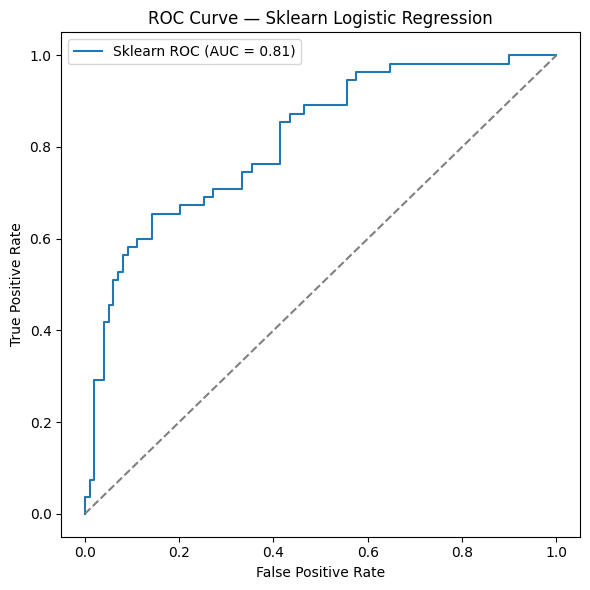

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    roc_curve,
    auc
)

#Training sklearn lr
skmodel=LogisticRegression()
skmodel.fit(xtrainnorm, ytrain)

#Predict probs on test set
yprobsk=skmodel.predict_proba(xtestnorm)[:, 1]

#Default threshold=0.5
ythreshsk=(yprobsk>=0.5).astype(int)

#Metrics
cm_sk=confusion_matrix(ytest,ythreshsk)
acc_sk=accuracy_score(ytest,ythreshsk)
prec_sk=precision_score(ytest,ythreshsk)
rec_sk=recall_score(ytest,ythreshsk)

print("Sklearn Confusion Matrix:\n", cm_sk)
print(f"Accuracy: {acc_sk:.3f}")
print(f"Precision: {prec_sk:.3f}")
print(f"Recall: {rec_sk:.3f}")

# ROC Curve
fpr_sk,tpr_sk, _=roc_curve(ytest,yprobsk)
auc_sk=auc(fpr_sk, tpr_sk)

plt.figure(figsize=(6,6))
plt.plot(fpr_sk, tpr_sk, label=f"Sklearn ROC (AUC = {auc_sk:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Sklearn Logistic Regression")
plt.legend()
plt.tight_layout()
plt.savefig("results/sklearn_roc.png")
plt.show()


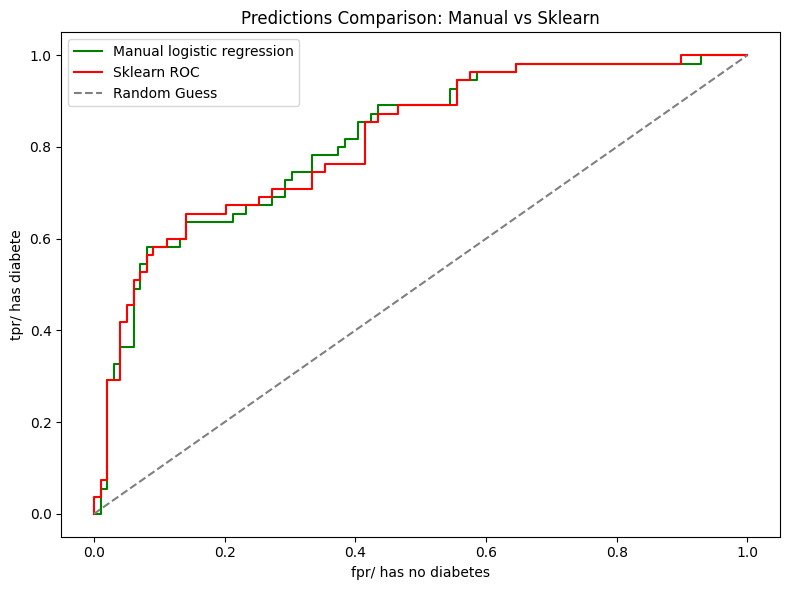

In [29]:
plt.figure(figsize=(8,6))

#manual model pred
plt.plot(fpr,tpr,color='green',label="Manual logistic regression")

#Sklearn model predictions
plt.plot(fpr_sk, tpr_sk,color='red' ,label="Sklearn ROC")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("fpr/ has no diabetes")
plt.ylabel("tpr/ has diabete")
plt.title("Predictions Comparison: Manual vs Sklearn")
plt.legend()
plt.tight_layout()
plt.savefig("resultspredictions_comparison.png")
plt.show()